# Trực quan hóa dữ liệu

In [1]:
import pandas as pd
df_order_init = pd.read_csv('order200_2.csv')
df_order = df_order_init.reset_index().iloc[:,1:]
df_order.head(5)

OrderID  Item(s)          Item 1            Item 2          Item 3  \
0   O0011        5  tropical fruit  other vegetables     white bread   
1   O0048        1      rolls/buns               NaN             NaN   
2   O0105        1            soda               NaN             NaN   
3   O0164        1     canned beer               NaN             NaN   
4   O0186       23     frankfurter               ham  tropical fruit   

          Item 4           Item 5            Item 6      Item 7  Item 8  ...  \
0  bottled water        chocolate               NaN         NaN     NaN  ...   
1            NaN              NaN               NaN         NaN     NaN  ...   
2            NaN              NaN               NaN         NaN     NaN  ...   
3            NaN              NaN               NaN         NaN     NaN  ...   
4      pip fruit  root vegetables  other vegetables  whole milk  butter  ...   

        Item 14       Item 15      Item 16        Item 17      Item 18  \
0           NaN           NaN          NaN            NaN          NaN   
1           NaN           NaN          NaN            NaN          NaN   
2           NaN           NaN          NaN            NaN          NaN   
3           NaN           NaN          NaN            NaN          NaN   
4  cream cheese  frozen meals  frozen fish  domestic eggs  white bread   

  Item 19  Item 20                Item 21       Item 22  Item 23  
0     NaN      NaN                    NaN           NaN      NaN  
1     NaN      NaN                    NaN           NaN      NaN  
2     NaN      NaN                    NaN           NaN      NaN  
3     NaN      NaN                    NaN           NaN      NaN  
4   sugar  cereals  fruit/vegetable juice  bottled beer  waffles  

[5 rows x 25 columns]

In [6]:
order = df_order['OrderID']
def get_item (df):
    item_list = pd.DataFrame(columns=['Item'])
    for index in df.index:
        nitem = df['Item(s)'][index]
        for i in range(nitem):
            item_list = item_list.append({'Item': df.iloc[index, 2+i]}, ignore_index=True)
    return item_list

item_list = get_item(df_order)
item = item_list.drop_duplicates().reset_index()['Item']

print("Số lượng sản phẩm: ", item.nunique())
print("Số lượng hóa đơn:", order.nunique())

Số lượng sản phẩm:  131
Số lượng hóa đơn: 200


## Đồ thị 2 phía

In [7]:
import networkx as nx
B = nx.Graph()

B.add_nodes_from(item, bipartite=0)
B.add_nodes_from(order, bipartite=1)

nlink = 0
for index in df_order.index:
    nitem = df_order['Item(s)'][index]
    nlink = nlink + nitem
    for i in range(nitem):
        # print(df_order.iloc[index, 2+i])
        B.add_edge(df_order.iloc[index, 0], df_order.iloc[index, 2+i], weight=1)

print("Số lượng cạnh của đồ thị 2 phía: ", nlink)

# left, right = nx.bipartite.sets(B)
# print("Các node bên trái: ", left)
# print("\nCác node bên phải: ", right)
# print("\nĐồ thị B có là đồ thị kết nối: ", nx.is_connected(B) )

Số lượng cạnh của đồ thị 2 phía:  944


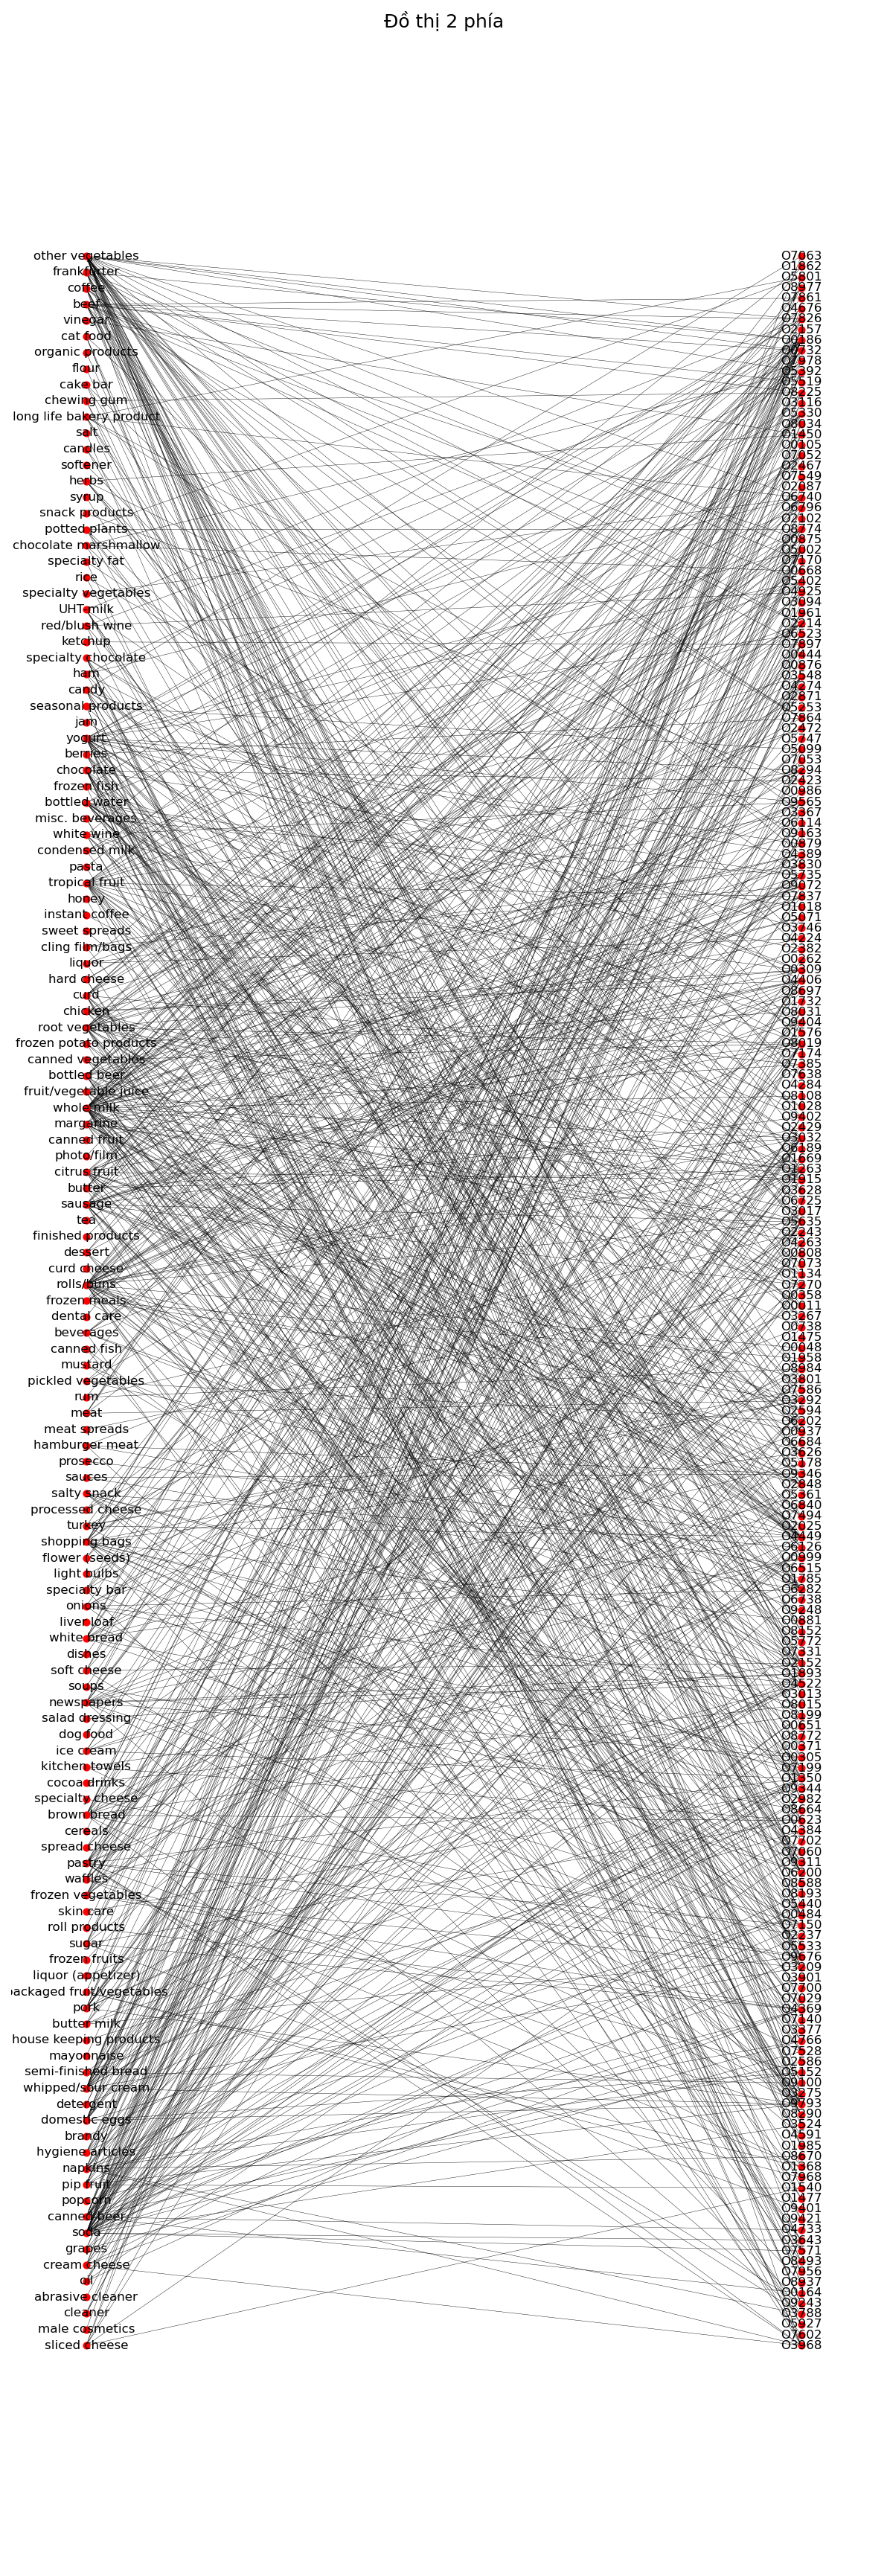

In [8]:
# Hiện thị đồ thị 2 phía
import matplotlib.pyplot as plt
pos = nx.drawing.layout.bipartite_layout(B, item)
plt.figure(figsize=(10,30) , dpi=150)
nx.draw_networkx(B, pos=pos, font_size=8, width=0.2, node_color='red' ,node_size=15)
plt.axis('off')
plt.title('Đồ thị 2 phía')
plt.show()

## Đồ thị 1 phía

Số lượng node: 200
Số lượng edge: 5678


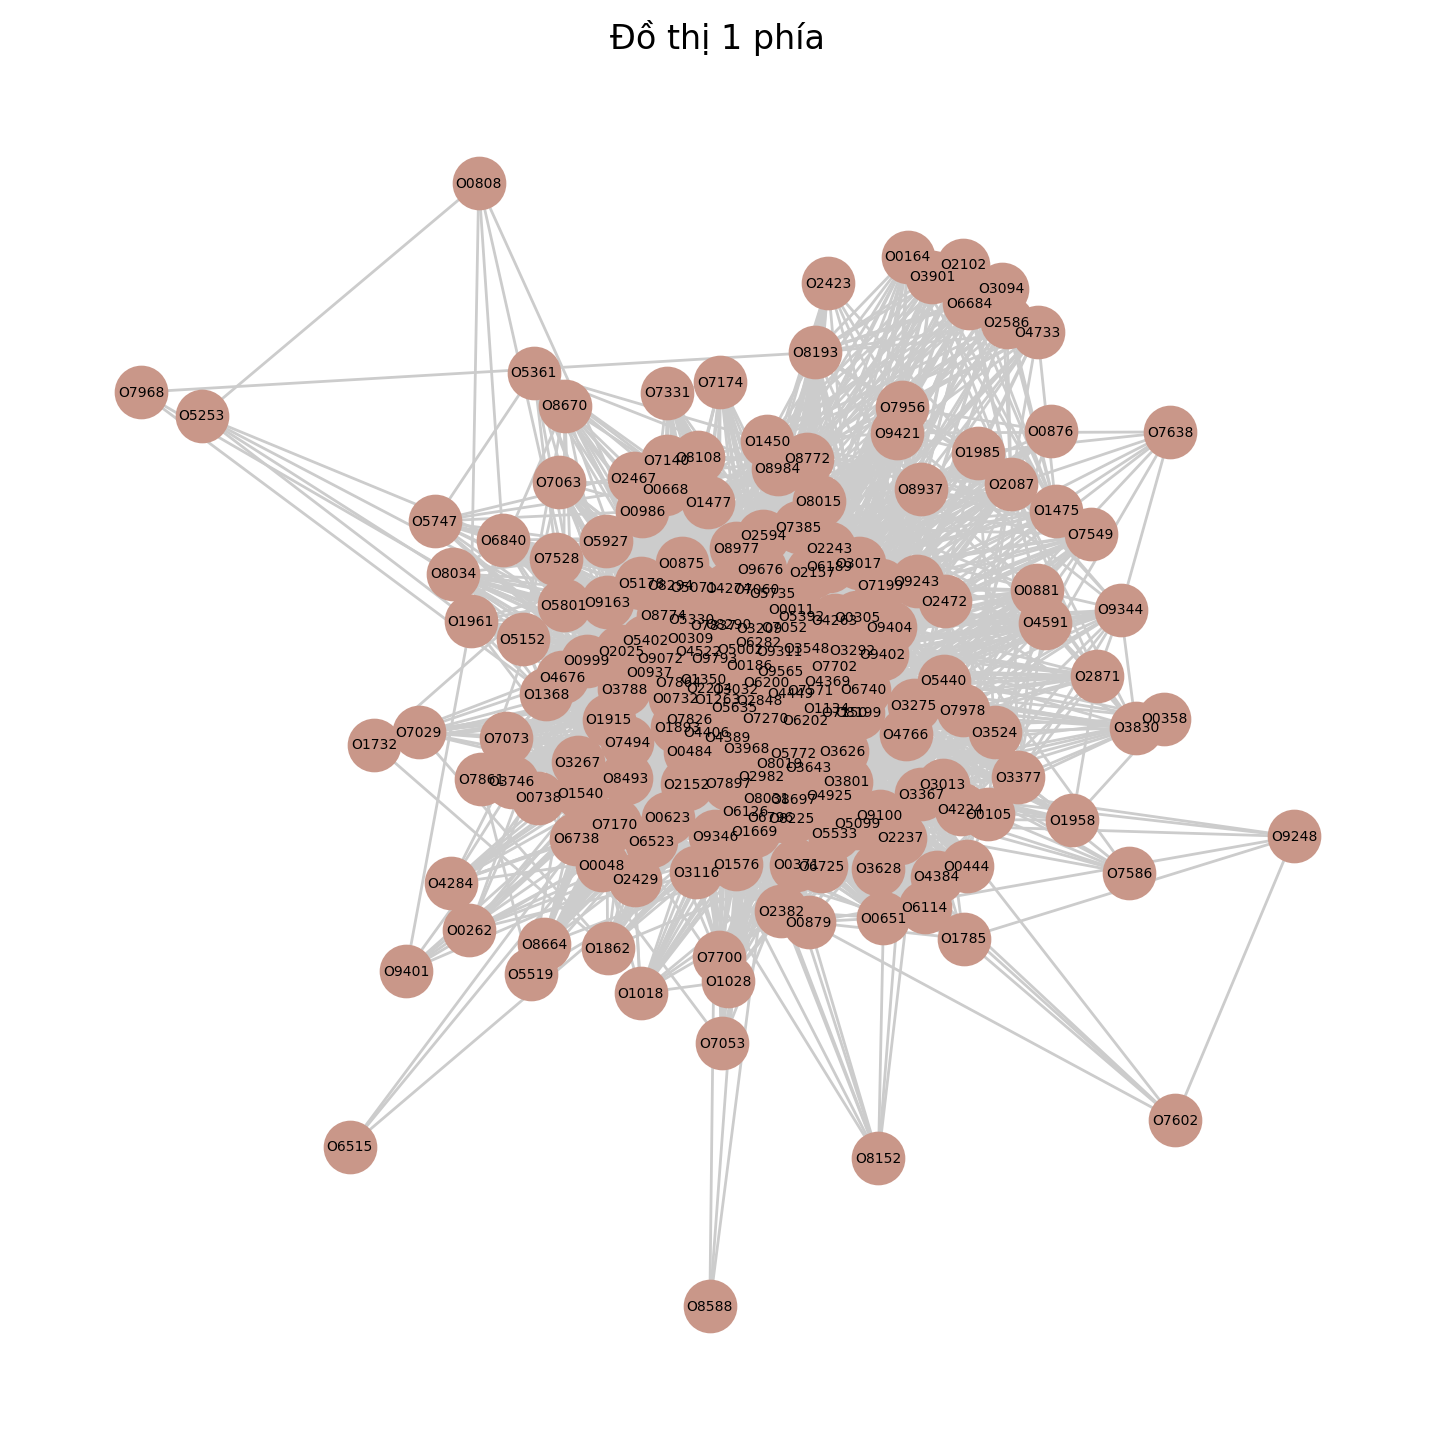

In [9]:
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

G = bipartite.weighted_projected_graph(B, order)
print("Số lượng node:", len(G.nodes()))
print("Số lượng edge:", len(G.edges()))

plt.figure(figsize=(9,9), dpi=200)

cmap = plt.cm.rainbow
layout = nx.spring_layout(G, k=0.5)
nodes = nx.draw_networkx_nodes(G, layout, nodelist=order,node_size=300, node_color='#c99789', linewidths=2)
nx.draw_networkx_edges(G, layout, edge_color='#cccccc')
node_labels = dict(zip(order, order))
nx.draw_networkx_labels(G, layout,labels=node_labels, font_size=5)
# nodes.set_edgecolor('#4b4b4b') # chỉnh viền của nodes

plt.axis('off')
plt.title('Đồ thị 1 phía')
plt.show()

In [10]:
# Số lượng của từng item trong 200 hóa đơn
# import numpy as np
# values, counts = np.unique(item_list, return_counts=True)

# Community Detected

## Lovain (Xong)

In [ ]:
!pip install python-louvain
import matplotlib.cm as cm 
import matplotlib
import community as community_louvain

partition = community_louvain.best_partition(G)
print("Số lượng cụm: ", max(partition.values())+1 )
# partition

Số lượng cụm:  5


In [ ]:
# Gán màu cho từng cụm
node_groups = []
color_map = []
for index, value in partition.items():
    # print(index, '->', value)
    if value == 0:
        color_map.append('green')
    elif value == 1:
        color_map.append('royalblue')
    elif value == 2:
        color_map.append('red')
    elif value == 3:
        color_map.append('orange')
    elif value == 4:
        color_map.append('cyan')

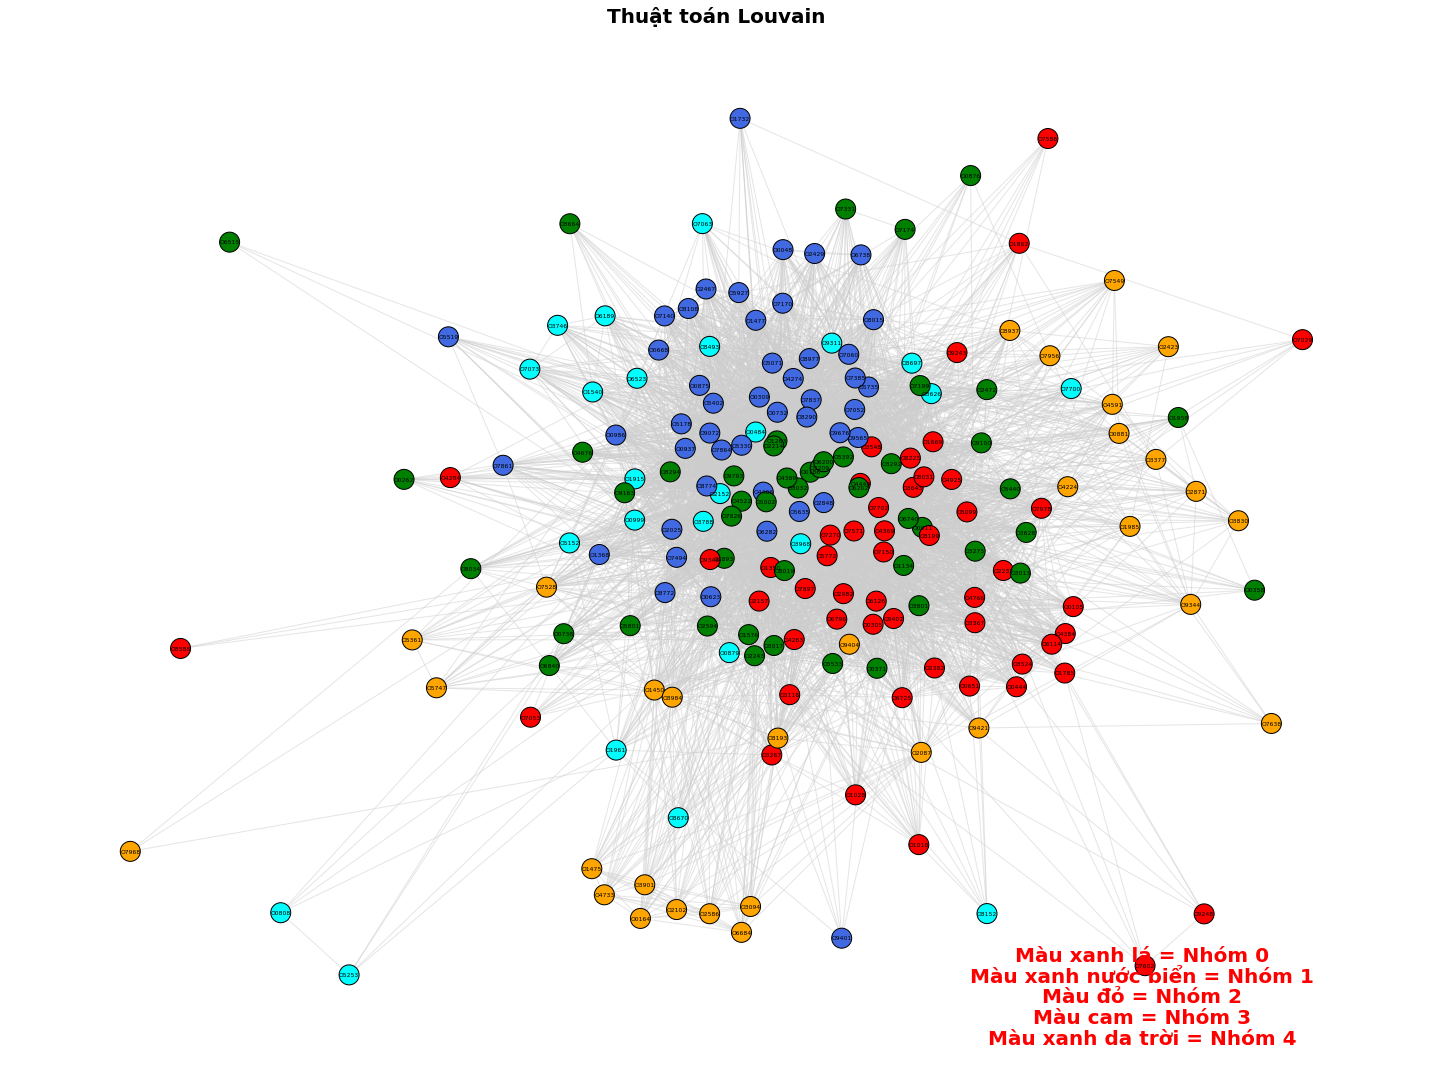

In [ ]:
# Vẽ đồ thị
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color="#CCCCCC") 
nx.draw_networkx_nodes(G, pos, node_size=400,  node_color= color_map, edgecolors='black') 
nx.draw_networkx_labels(G, pos, font_size=6)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Thuật toán Louvain", font)
# Change font color for legend
font["color"] = "r"

ax.text(0.80,  0.1, "Màu xanh lá = Nhóm 0",
    horizontalalignment="center", transform=ax.transAxes, fontdict=font)
ax.text(0.80, 0.08, "Màu xanh nước biển = Nhóm 1",
    horizontalalignment="center", transform=ax.transAxes, fontdict=font)
ax.text(0.80, 0.06, "Màu đỏ = Nhóm 2",
    horizontalalignment="center", transform=ax.transAxes, fontdict=font)
ax.text(0.80, 0.04, "Màu cam = Nhóm 3",
    horizontalalignment="center", transform=ax.transAxes, fontdict=font)
ax.text(0.80, 0.02, "Màu xanh da trời = Nhóm 4",
    horizontalalignment="center", transform=ax.transAxes, fontdict=font)

# Resize figure for label readibility
# ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

In [ ]:
import seaborn as sns

def nodeInCluster (i):
    order_i = []
    for key, value in partition.items():
        if(value == i):
            order_i.append(key)
    return order_i

def ItemInClustering(ith):
    x = nodeInCluster(ith)
    itemlist = pd.DataFrame(columns=['Item'])

    for k in x:
        df = df_order.loc[df_order['OrderID'] == k]
        nitem = int(df['Item(s)'])
        for i in range(nitem):
            itemlist = itemlist.append({'Item': df.iloc[0, 2+i]}, ignore_index=True)
    
    print(itemlist)
    return itemlist

In [ ]:
for i in range(max(partition.values())+1):
    print("Nhóm ", i)
    x = nodeInCluster(i)
    print(x)

Nhóm  0
['O3292', 'O8774', 'O5927', 'O0986', 'O5178', 'O5533', 'O7174', 'O7571', 'O7702', 'O7864', 'O7199', 'O5440', 'O8664', 'O2025', 'O1893', 'O1134', 'O1576', 'O2467', 'O5002', 'O9793', 'O3209', 'O7385', 'O3032', 'O0371', 'O3801', 'O3013', 'O5392', 'O1477', 'O7052', 'O0186', 'O1732', 'O7140', 'O0262', 'O0875', 'O9163', 'O3017', 'O2214', 'O8108', 'O8977', 'O8015', 'O7331', 'O6202', 'O9401', 'O6740', 'O0732', 'O1263', 'O0011', 'O4676', 'O4369', 'O8019', 'O0668', 'O6515', 'O9100', 'O4522', 'O3628', 'O9676']
Nhóm  1
['O7897', 'O0305', 'O7053', 'O8937', 'O6725', 'O4384', 'O1985', 'O9404', 'O0444', 'O3830', 'O9243', 'O4284', 'O1350', 'O7150', 'O4263', 'O2237', 'O0651', 'O1785', 'O3548', 'O6126', 'O7549', 'O7602', 'O8199', 'O2382', 'O1862', 'O0881', 'O0105', 'O7029', 'O1028', 'O6796', 'O2982', 'O7978', 'O4766', 'O7956', 'O6114', 'O7638', 'O3116', 'O3267', 'O4224', 'O3377', 'O8152', 'O3367', 'O0876', 'O7270', 'O9402', 'O3524', 'O3275', 'O9344', 'O0738', 'O2472', 'O4591', 'O4449', 'O8031', '

               Item
0              meat
1            turkey
2      citrus fruit
3    tropical fruit
4             herbs
..              ...
317     brown bread
318          pastry
319             oil
320        cake bar
321       chocolate

[322 rows x 1 columns]


Text(0.5, 1.0, 'Thông kê món hàng trong cụm 0')

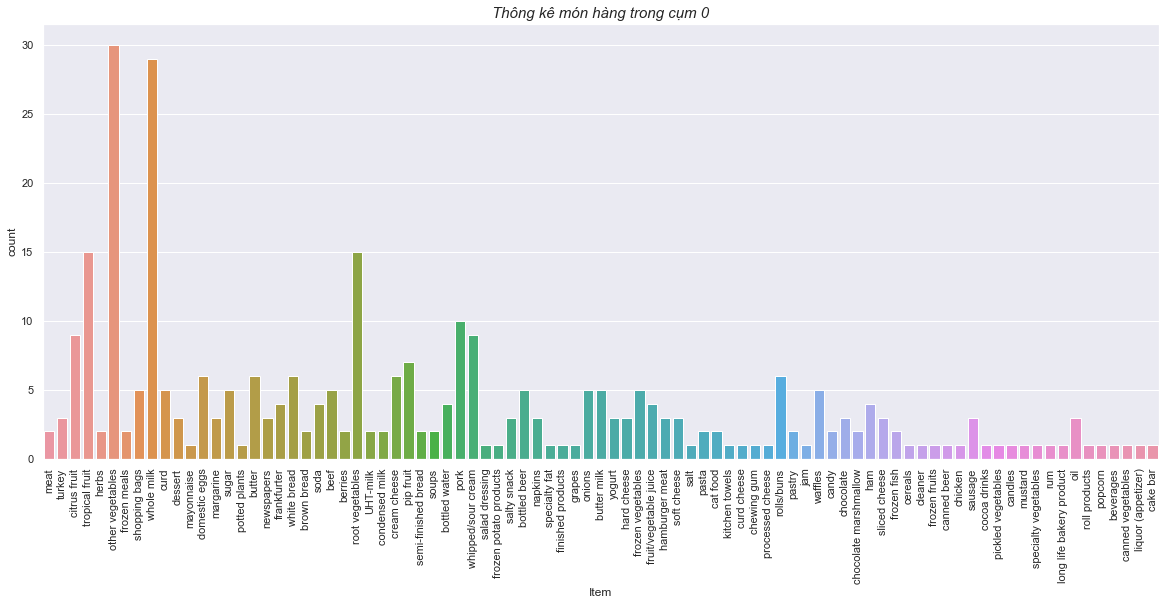

In [ ]:
df0= ItemInClustering(0)
sns.countplot(x='Item',data=df0)
sns.set(rc={'figure.figsize':(20,17)})
plt.xticks(rotation=90)
plt.title('Thông kê món hàng trong cụm 0',fontsize=15, style='oblique')

                 Item
0         frankfurter
1    processed cheese
2       domestic eggs
3         white bread
4         brown bread
..                ...
228    snack products
229         chocolate
230     bottled water
231      frozen meals
232      bottled beer

[233 rows x 1 columns]


Text(0.5, 1.0, 'Thông kê món hàng trong cụm 1')

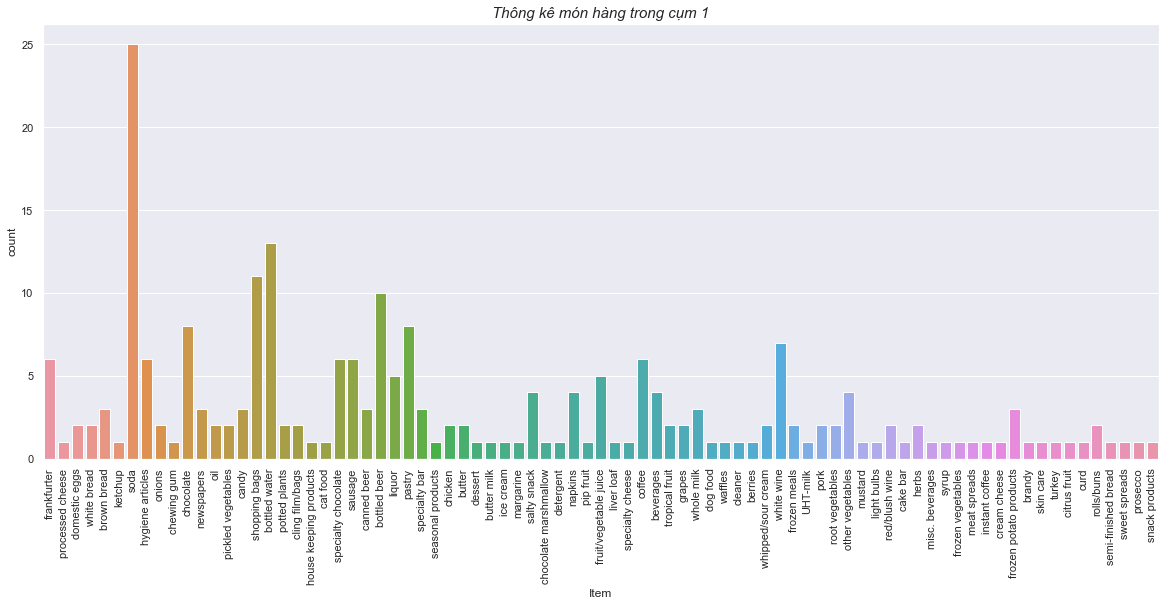

In [ ]:
df1 = ItemInClustering(1)
sns.countplot(x='Item',data=df1)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(rotation=90)
plt.title('Thông kê món hàng trong cụm 1',fontsize=15, style='oblique')

                   Item
0                turkey
1     seasonal products
2             ice cream
3         domestic eggs
4            rolls/buns
..                  ...
150          newspapers
151          whole milk
152  whipped/sour cream
153          rolls/buns
154       shopping bags

[155 rows x 1 columns]


Text(0.5, 1.0, 'Thông kê món hàng trong cụm 2')

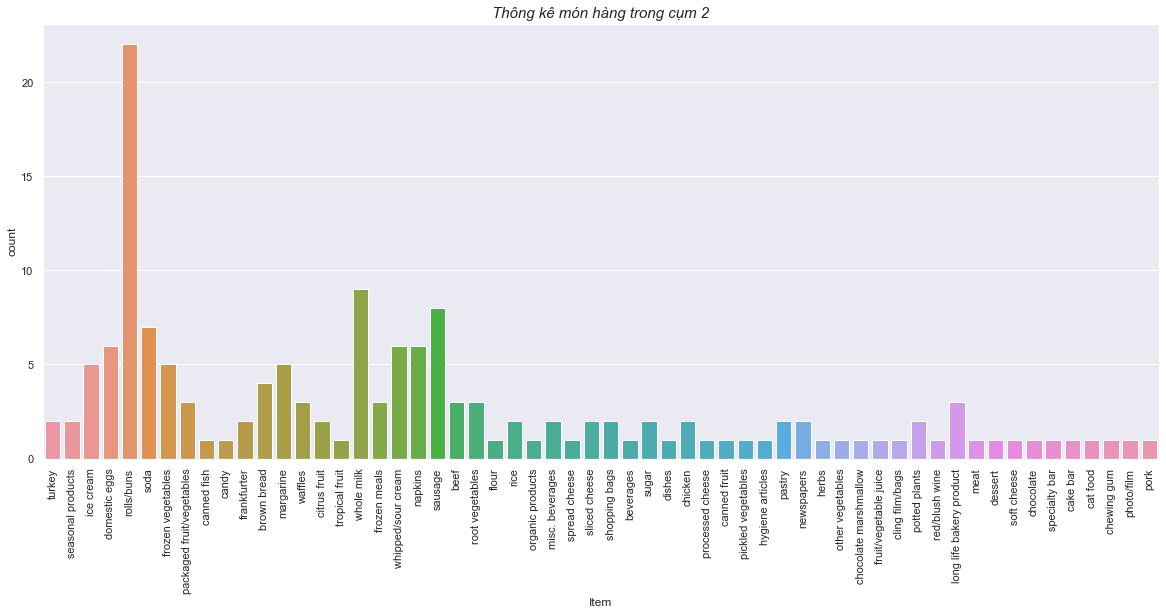

In [ ]:
df2 = ItemInClustering(2)
sns.countplot(x='Item',data=df2)
sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=90)
plt.title('Thông kê món hàng trong cụm 2',fontsize=15, style='oblique')

                  Item
0                herbs
1                 curd
2        roll products
3              vinegar
4          canned beer
5           newspapers
6           newspapers
7           newspapers
8           whole milk
9                 soda
10         canned beer
11  liquor (appetizer)
12          newspapers
13         frozen fish
14         brown bread
15         canned beer
16                 rum
17          newspapers
18         canned beer
19         canned beer
20         canned beer
21              grapes
22         hard cheese
23           margarine
24       specialty fat
25          newspapers
26        bottled beer
27         canned beer
28         canned beer
29    other vegetables
30         white bread
31           margarine
32         canned beer
33                 rum
34         canned beer
35         canned beer
36         canned beer
37         canned fish
38         canned beer
39           chocolate
40                 ham
41        citrus fruit
42     root

Text(0.5, 1.0, 'Thông kê món hàng trong cụm 3')

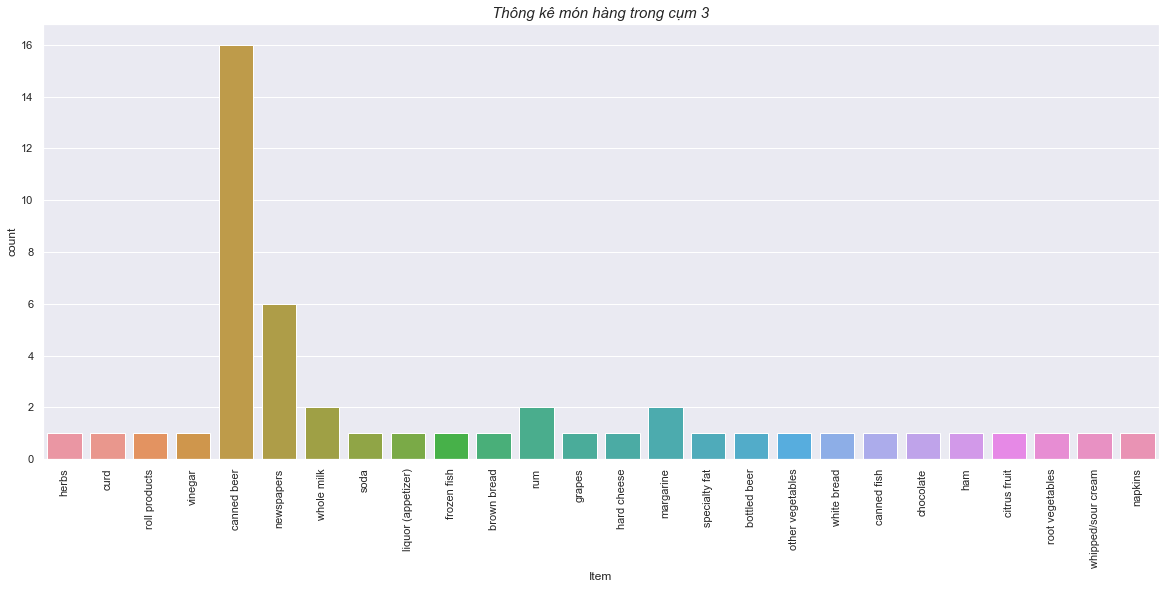

In [ ]:
df3 = ItemInClustering(3)
sns.countplot(x='Item',data=df3)
sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=90)
plt.title('Thông kê món hàng trong cụm 3',fontsize=15, style='oblique')

                   Item
0                yogurt
1           light bulbs
2                  beef
3                grapes
4               berries
..                  ...
180                curd
181              yogurt
182  whipped/sour cream
183            UHT-milk
184         brown bread

[185 rows x 1 columns]


Text(0.5, 1.0, 'Thông kê món hàng trong cụm 4')

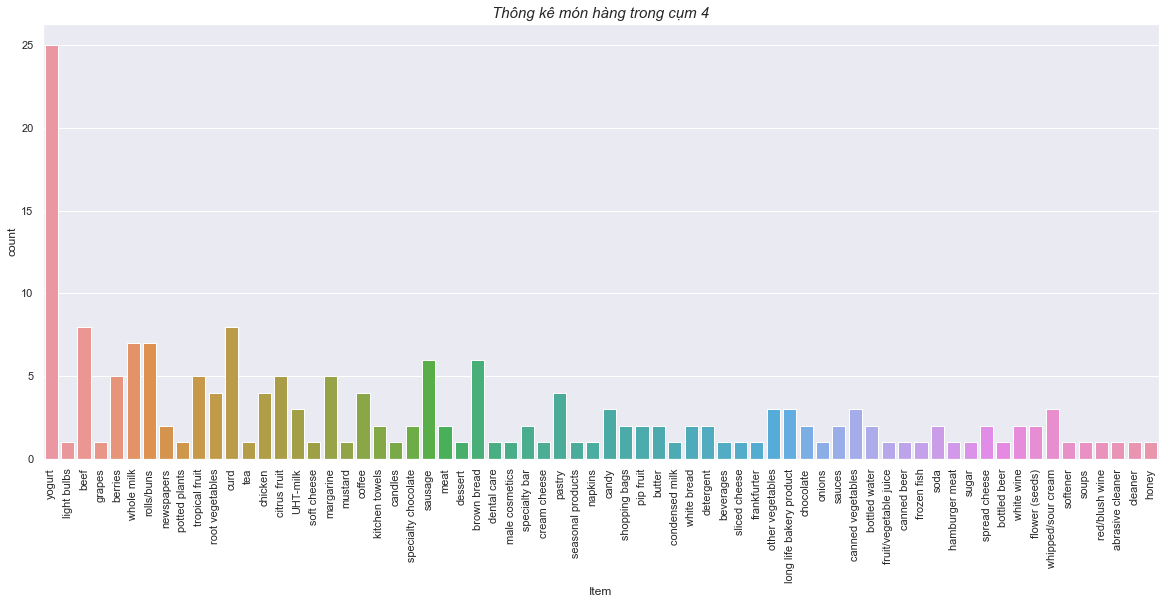

In [ ]:
df4 = ItemInClustering(4)
sns.countplot(x='Item',data=df4)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(rotation=90)
plt.title('Thông kê món hàng trong cụm 4',fontsize=15, style='oblique')

In [ ]:
# H = nx.make_clique_bipartite(B)
# H.number_of_nodes()

H = nx.make_clique_bipartite(B)

# plt.figure(figsize=(12,10), dpi=200)
# layout = nx.spring_layout(H)
# nx.draw_networkx_nodes(H, layout, nodelist=order,node_size=100, node_color='#c99789')
# nx.draw_networkx_edges(H, layout, edge_color='#cccccc')

# node_labels = dict(zip(order, order))
# nx.draw_networkx_labels(H, layout,labels=node_labels, font_size=5)

# plt.axis('off')
# plt.title('Hraph company')
# plt.show()

## Kmeans (xong)

In [4]:
df_vector = pd.DataFrame(columns =["OrderID","whole milk",	"other vegetables",	"soda",	"rolls/buns",	"yogurt",	"root vegetables",	"tropical fruit",	"sausage",	"canned beer",	"whipped/sour cream",	"shopping bags",	"bottled water",	"citrus fruit",	"bottled beer",	"beef",	"brown bread",	"pastry",	"newspapers",	"margarine",	"chocolate",	"curd",	"napkins",	"domestic eggs",	"frankfurter",	"pork",	"fruit/vegetable juice",	"frozen vegetables",	"white bread",	"pip fruit",	"butter",	"coffee",	"chicken",	"white wine",	"candy",	"waffles",	"berries",	"sugar",	"specialty chocolate",	"cream cheese",	"onions",	"frozen meals",	"beverages",	"salty snack",	"hygiene articles",	"long life bakery product",	"potted plants",	"specialty bar",	"butter milk",	"turkey",	"herbs",	"dessert",	"ice cream",	"UHT-milk",	"sliced cheese",	"ham",	"grapes",	"meat",	"liquor",	"oil",	"soft cheese",	"hamburger meat",	"red/blush wine",	"frozen potato products",	"hard cheese",	"pickled vegetables",	"frozen fish",	"canned vegetables",	"cat food",	"chocolate marshmallow",	"seasonal products",	"packaged fruit/vegetables",	"misc. beverages",	"detergent",	"processed cheese",	"condensed milk",	"cleaner",	"cling film/bags",	"spread cheese",	"chewing gum",	"semi-finished bread",	"rum",	"soups",	"mustard",	"kitchen towels",	"cake bar",	"pasta",	"liquor (appetizer)",	"light bulbs",	"canned fish",	"sauces",	"specialty fat",	"roll products",	"candles",	"flower (seeds)",	"rice",	"curd cheese",	"flour",	"popcorn",	"finished products",	"dog food",	"photo/film",	"salt",	"specialty cheese",	"house keeping products",	"vinegar",	"prosecco",	"liver loaf",	"canned fruit",	"frozen fruits",	"brandy",	"sweet spreads",	"instant coffee",	"snack products",	"mayonnaise",	"dental care",	"cereals",	"meat spreads",	"dishes",	"male cosmetics",	"abrasive cleaner",	"syrup",	"ketchup",	"skin care",	"cocoa drinks",	"softener",	"organic products",	"honey",	"jam",	"tea",	"salad dressing",	"specialty vegetables"])

In [5]:
list_item = ["whole milk",	"other vegetables",	"soda",	"rolls/buns",	"yogurt",	"root vegetables",	"tropical fruit",	"sausage",	"canned beer",	"whipped/sour cream",	"shopping bags",	"bottled water",	"citrus fruit",	"bottled beer",	"beef",	"brown bread",	"pastry",	"newspapers",	"margarine",	"chocolate",	"curd",	"napkins",	"domestic eggs",	"frankfurter",	"pork",	"fruit/vegetable juice",	"frozen vegetables",	"white bread",	"pip fruit",	"butter",	"coffee",	"chicken",	"white wine",	"candy",	"waffles",	"berries",	"sugar",	"specialty chocolate",	"cream cheese",	"onions",	"frozen meals",	"beverages",	"salty snack",	"hygiene articles",	"long life bakery product",	"potted plants",	"specialty bar",	"butter milk",	"turkey",	"herbs",	"dessert",	"ice cream",	"UHT-milk",	"sliced cheese",	"ham",	"grapes",	"meat",	"liquor",	"oil",	"soft cheese",	"hamburger meat",	"red/blush wine",	"frozen potato products",	"hard cheese",	"pickled vegetables",	"frozen fish",	"canned vegetables",	"cat food",	"chocolate marshmallow",	"seasonal products",	"packaged fruit/vegetables",	"misc. beverages",	"detergent",	"processed cheese",	"condensed milk",	"cleaner",	"cling film/bags",	"spread cheese",	"chewing gum",	"semi-finished bread",	"rum",	"soups",	"mustard",	"kitchen towels",	"cake bar",	"pasta",	"liquor (appetizer)",	"light bulbs",	"canned fish",	"sauces",	"specialty fat",	"roll products",	"candles",	"flower (seeds)",	"rice",	"curd cheese",	"flour",	"popcorn",	"finished products",	"dog food",	"photo/film",	"salt",	"specialty cheese",	"house keeping products",	"vinegar",	"prosecco",	"liver loaf",	"canned fruit",	"frozen fruits",	"brandy",	"sweet spreads",	"instant coffee",	"snack products",	"mayonnaise",	"dental care",	"cereals",	"meat spreads",	"dishes",	"male cosmetics",	"abrasive cleaner",	"syrup",	"ketchup",	"skin care",	"cocoa drinks",	"softener",	"organic products",	"honey",	"jam",	"tea",	"salad dressing",	"specialty vegetables"]

In [6]:
# Chuyển sang vector để phân tích kmeans
import numpy as np
for index, row in df_order.iterrows():
    df_vector.at[index, 'OrderID'] = row['OrderID']    # Gán ID hóa đơn cho ô đầu tiên
    no_item = row['Item(s)']                           # số lượng sản phẩm trong hóa đơn
    for i in range(no_item):
        items = df_order.iloc[index, 2+i]
        df_vector.at[index, items] = 1                 # Các mặt hàng có trong hóa đơn gán 1

for i,j in zip(*np.where(pd.isnull(df_vector))):     
    df_vector.iloc[i,j] = int(0)                       # Các mặt hàng không có trong hóa đơn gán 0


df_vector.head(5)

# df_vector.to_csv('df_vector.csv', index=False, header=True) # xuất file ra

OrderID whole milk other vegetables soda rolls/buns yogurt root vegetables  \
0   O0011          0                1    0          0      0               0   
1   O0048          0                0    0          1      0               0   
2   O0105          0                0    1          0      0               0   
3   O0164          0                0    0          0      0               0   
4   O0186          1                1    0          0      1               1   

  tropical fruit sausage canned beer  ... ketchup skin care cocoa drinks  \
0              1       0           0  ...       0         0            0   
1              0       0           0  ...       0         0            0   
2              0       0           0  ...       0         0            0   
3              0       0           1  ...       0         0            0   
4              1       0           0  ...       0         0            0   

  softener organic products honey jam tea salad dressing specialty vegetables  
0        0                0     0   0   0              0                    0  
1        0                0     0   0   0              0                    0  
2        0                0     0   0   0              0                    0  
3        0                0     0   0   0              0                    0  
4        0                0     0   0   0              0                    0  

[5 rows x 132 columns]

In [7]:
# Phương pháp cùi chỏ
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np
X=df_vector.drop("OrderID",axis=1)
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(  title="Inertia vs Cluster Number",
                    xaxis=dict(range=[0,11],title="Cluster Number"), 
                    yaxis={'title':'Inertia'},
                    annotations=[
                        dict(
                            x=3,
                            y=inertia[2],
                            xref="x",
                            yref="y",
                            text="Elbow!",
                            showarrow=True,
                            arrowhead=7,
                            ax=20,
                            ay=-40
                        )
                    ]
                )
                

C:\Users\quyen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
# Phương pháp tính hệ số trung bình silhouette

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

X=df_vector.drop("OrderID",axis=1)

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print( "Với cụm =", n_clusters, ". Giá trị silhouette_score trung bình là :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i



Với cụm = 2 . Giá trị silhouette_score trung bình là : 0.2106902344388537
Với cụm = 3 . Giá trị silhouette_score trung bình là : 0.09901905655401791
Với cụm = 4 . Giá trị silhouette_score trung bình là : 0.05877333083866951
Với cụm = 5 . Giá trị silhouette_score trung bình là : 0.10650799759632329
Với cụm = 6 . Giá trị silhouette_score trung bình là : 0.05851082463488078
Với cụm = 7 . Giá trị silhouette_score trung bình là : 0.07026135931919629
Với cụm = 8 . Giá trị silhouette_score trung bình là : 0.054691947398296546
Với cụm = 9 . Giá trị silhouette_score trung bình là : 0.07582918385505899


In [ ]:
# Phân cụm bằng Kmeans
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2)
# kmeans.labels_
X=df_vector.drop("OrderID",axis=1)
y = kmeans.fit_predict(X)

df_vector['Cluster'] = y

print("Số lượng node trong cụm 0: ", len(df_vector[df_vector['Cluster']==0]) )
print("Số lượng node trong cụm 1: ", len(df_vector[df_vector['Cluster']==1]) )

Số lượng node trong cụm 0:  160
Số lượng node trong cụm 1:  40


In [ ]:
# Tô màu cho từng cụm
color_map = []
for index, row in df_vector.iterrows():
    # print(index, '->', value)
    value = row['Cluster']
    if value == 0:
        color_map.append('green')
    elif value == 1:
        color_map.append('royalblue')
    else:
        color_map.append('orange')

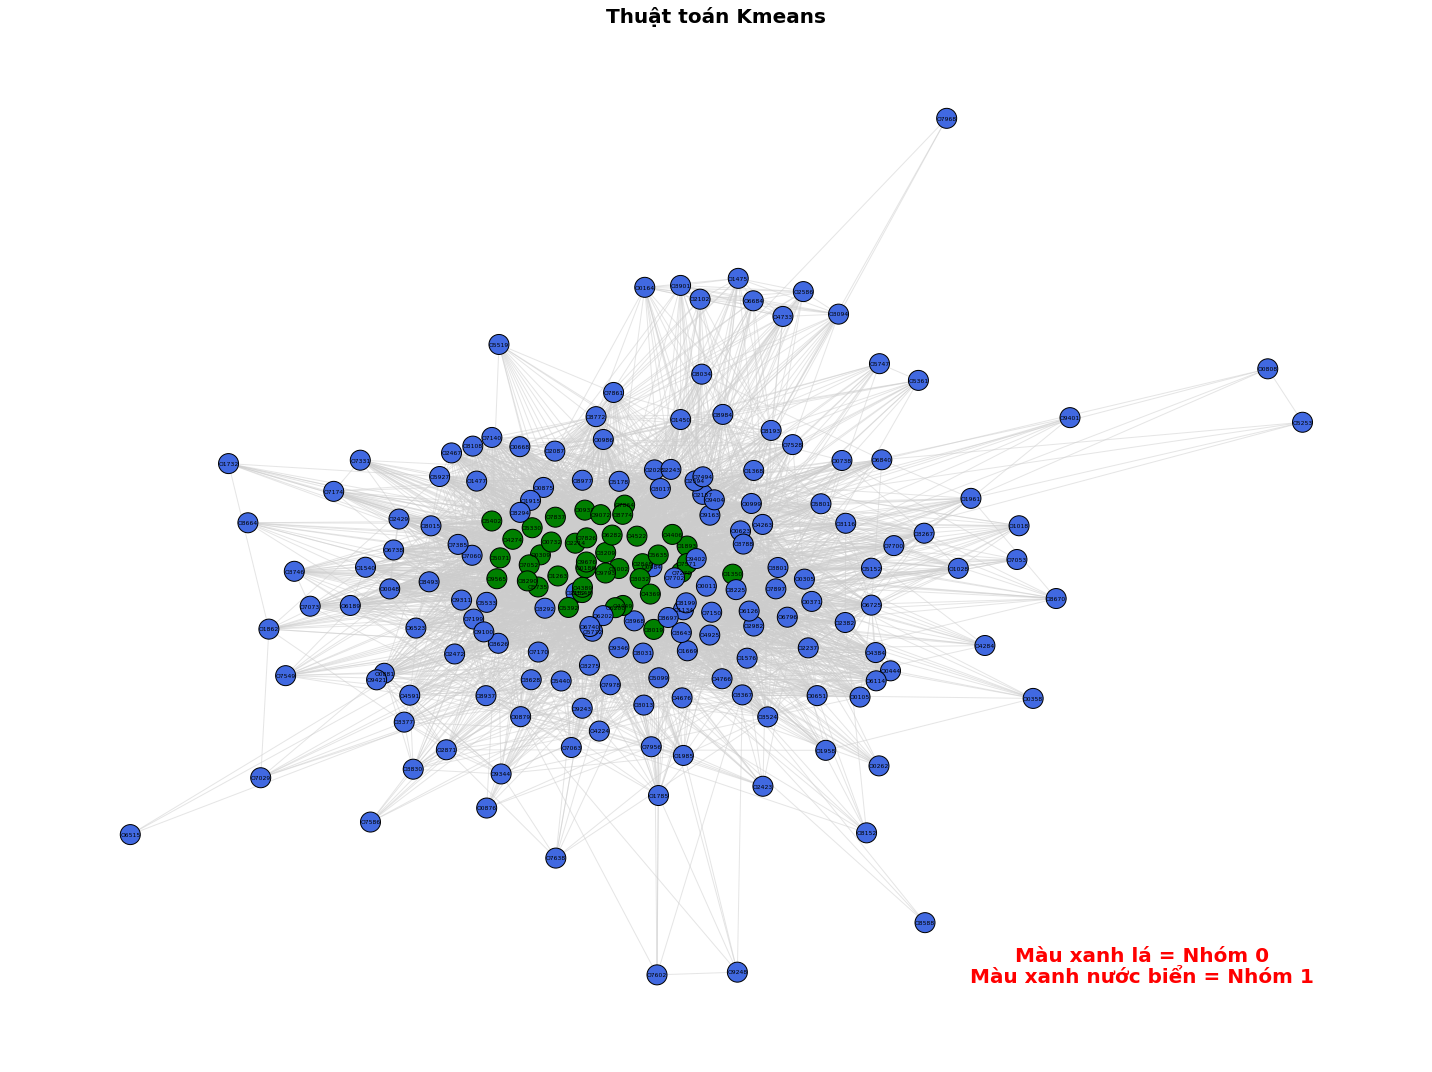

In [ ]:
# Vẽ đồ thị
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color="#CCCCCC") 
nx.draw_networkx_nodes(G, pos, node_size=400,  node_color= color_map, edgecolors='black') 
nx.draw_networkx_labels(G, pos, font_size=6)

font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Thuật toán Kmeans", font)

font["color"] = "r"
ax.text(
    0.80,
    0.1,
    "Màu xanh lá = Nhóm 0",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.08,
    "Màu xanh nước biển = Nhóm 1",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

fig.tight_layout()
plt.axis("off")
plt.show()

In [ ]:
def Cum_KMean (ith):
    df_i = df_vector[df_vector.Cluster == ith]
    list_item_i = []
    count_df_i = []
    for item in list_item:
        no = df_i[item].sum()
        if(no != 0):
            list_item_i.append(item)
            count_df_i.append(no)
    import seaborn as sns
    plt.figure(figsize=(20,8), dpi=200)
    sns.barplot(x=list_item_i, y=count_df_i)
    plt.xlabel('Tên các mặt hàng')
    plt.ylabel('Số lượng')
    plt.xticks(rotation=90)
    title_ith = 'Thông kê món hàng trong cụm ' + str(ith)
    plt.title(str(title_ith),fontsize=25, style='oblique')
    plt.show()

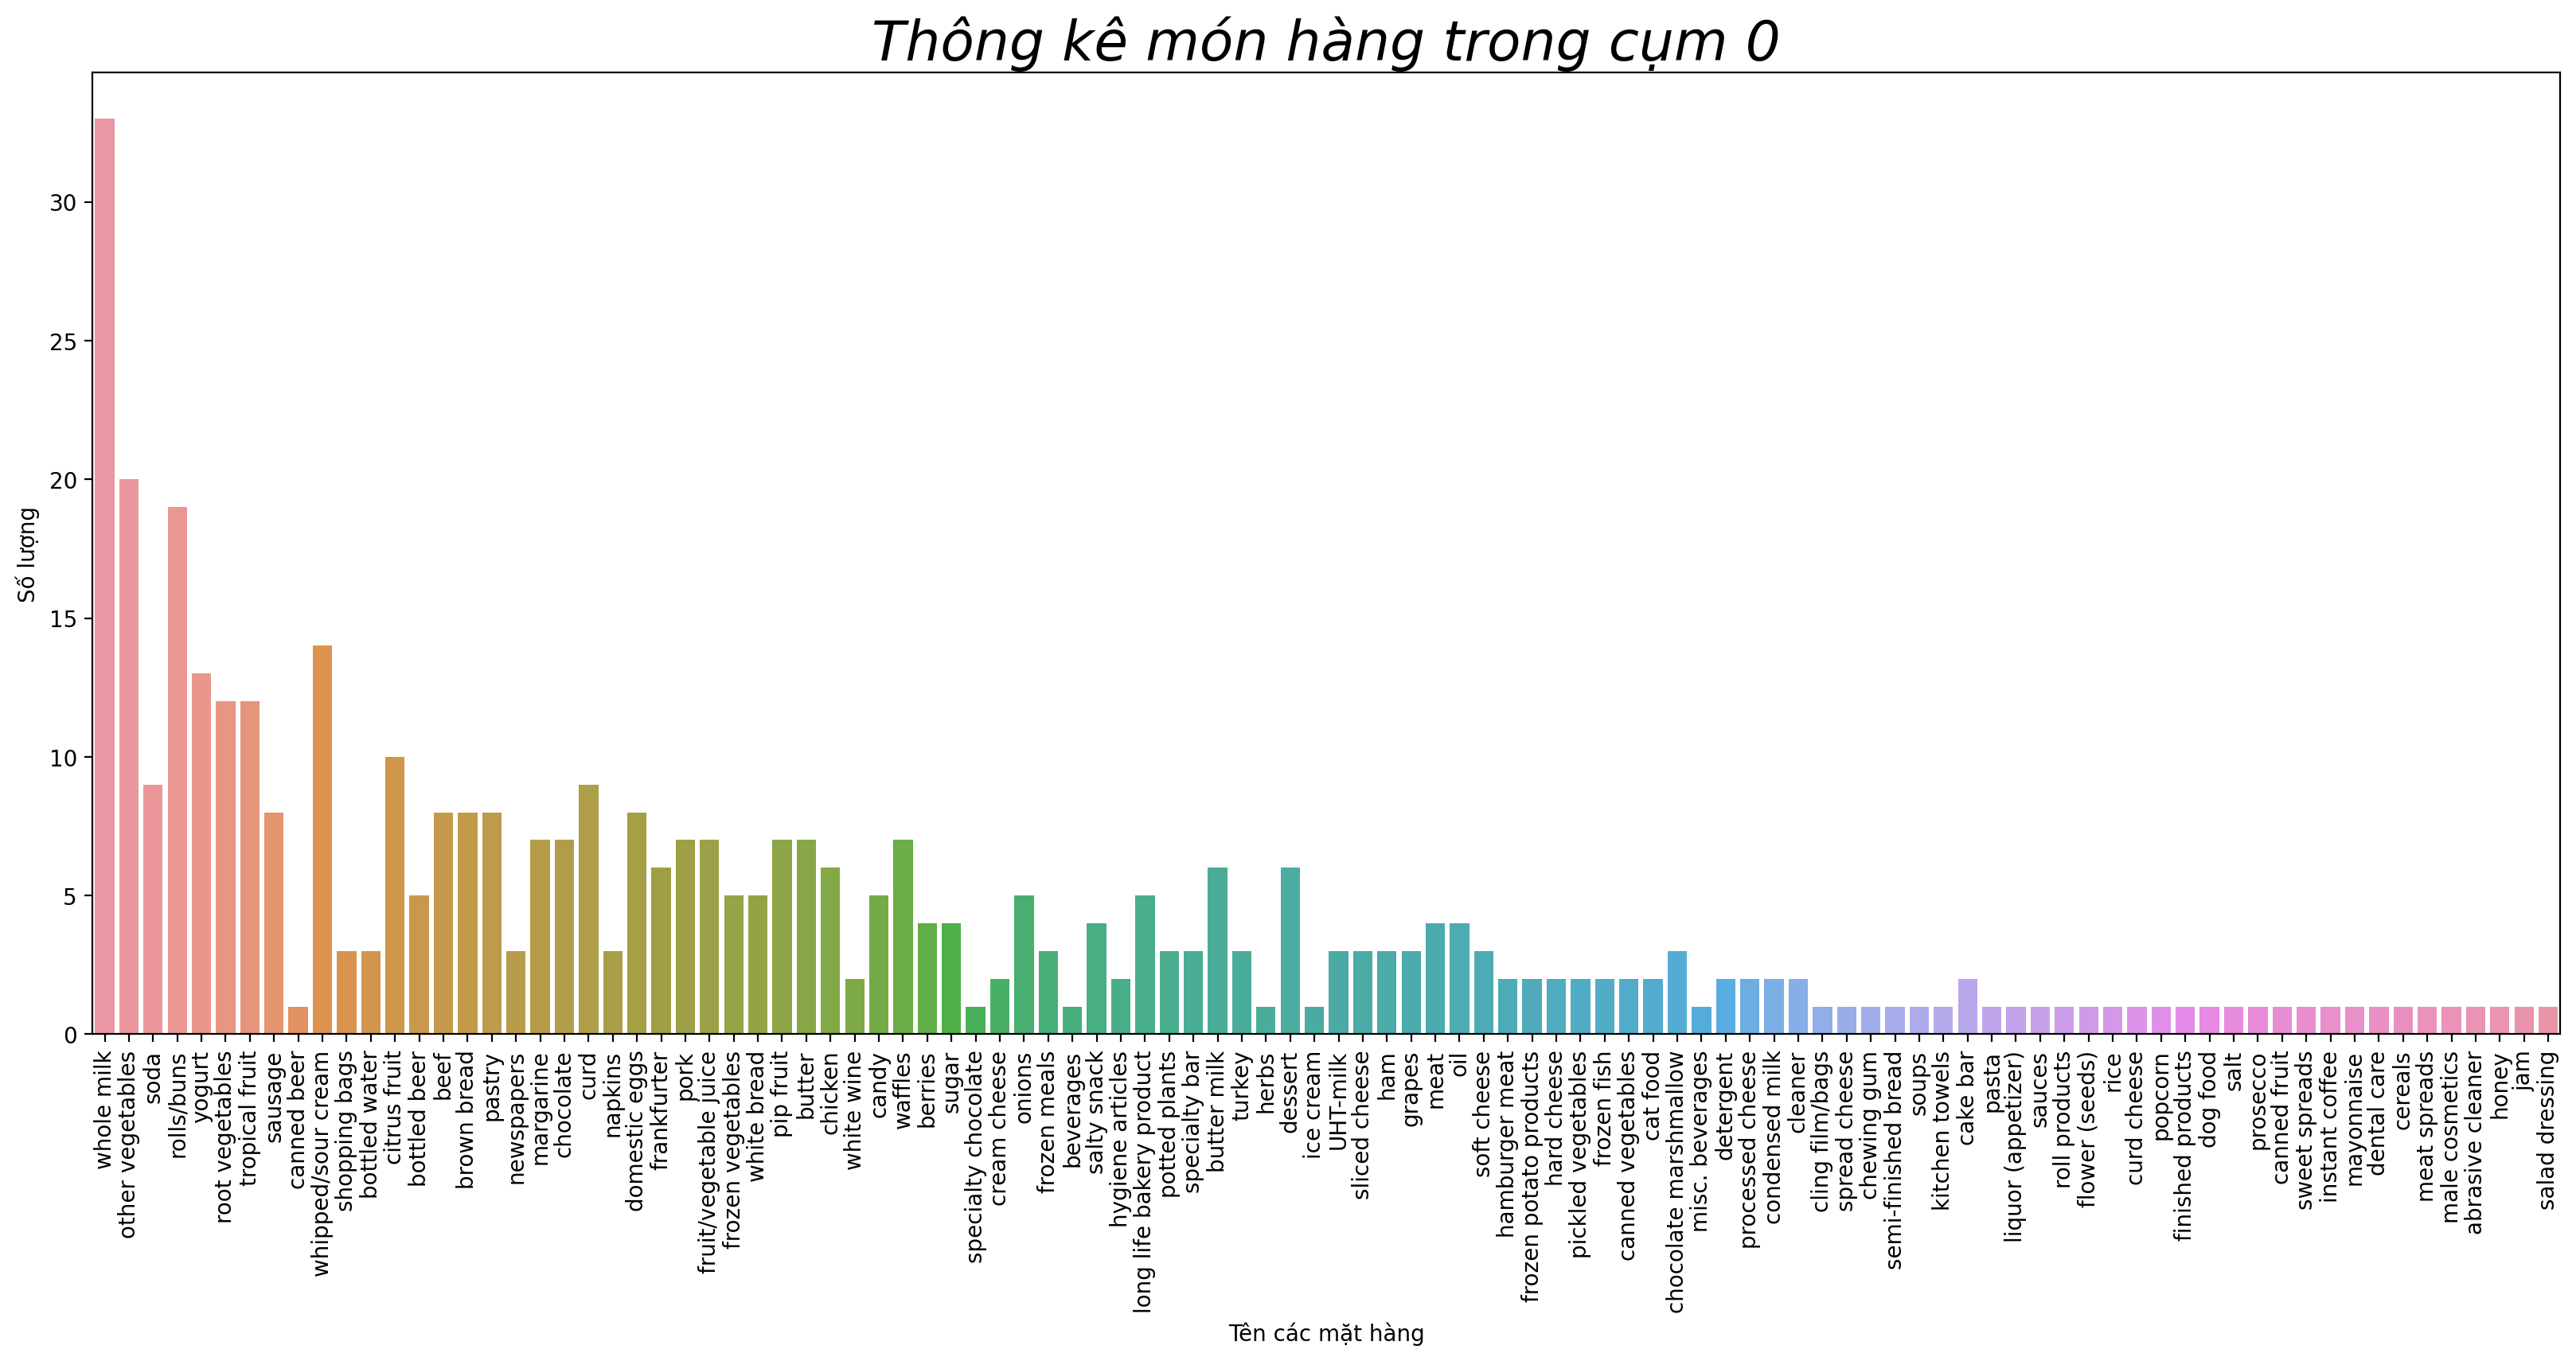

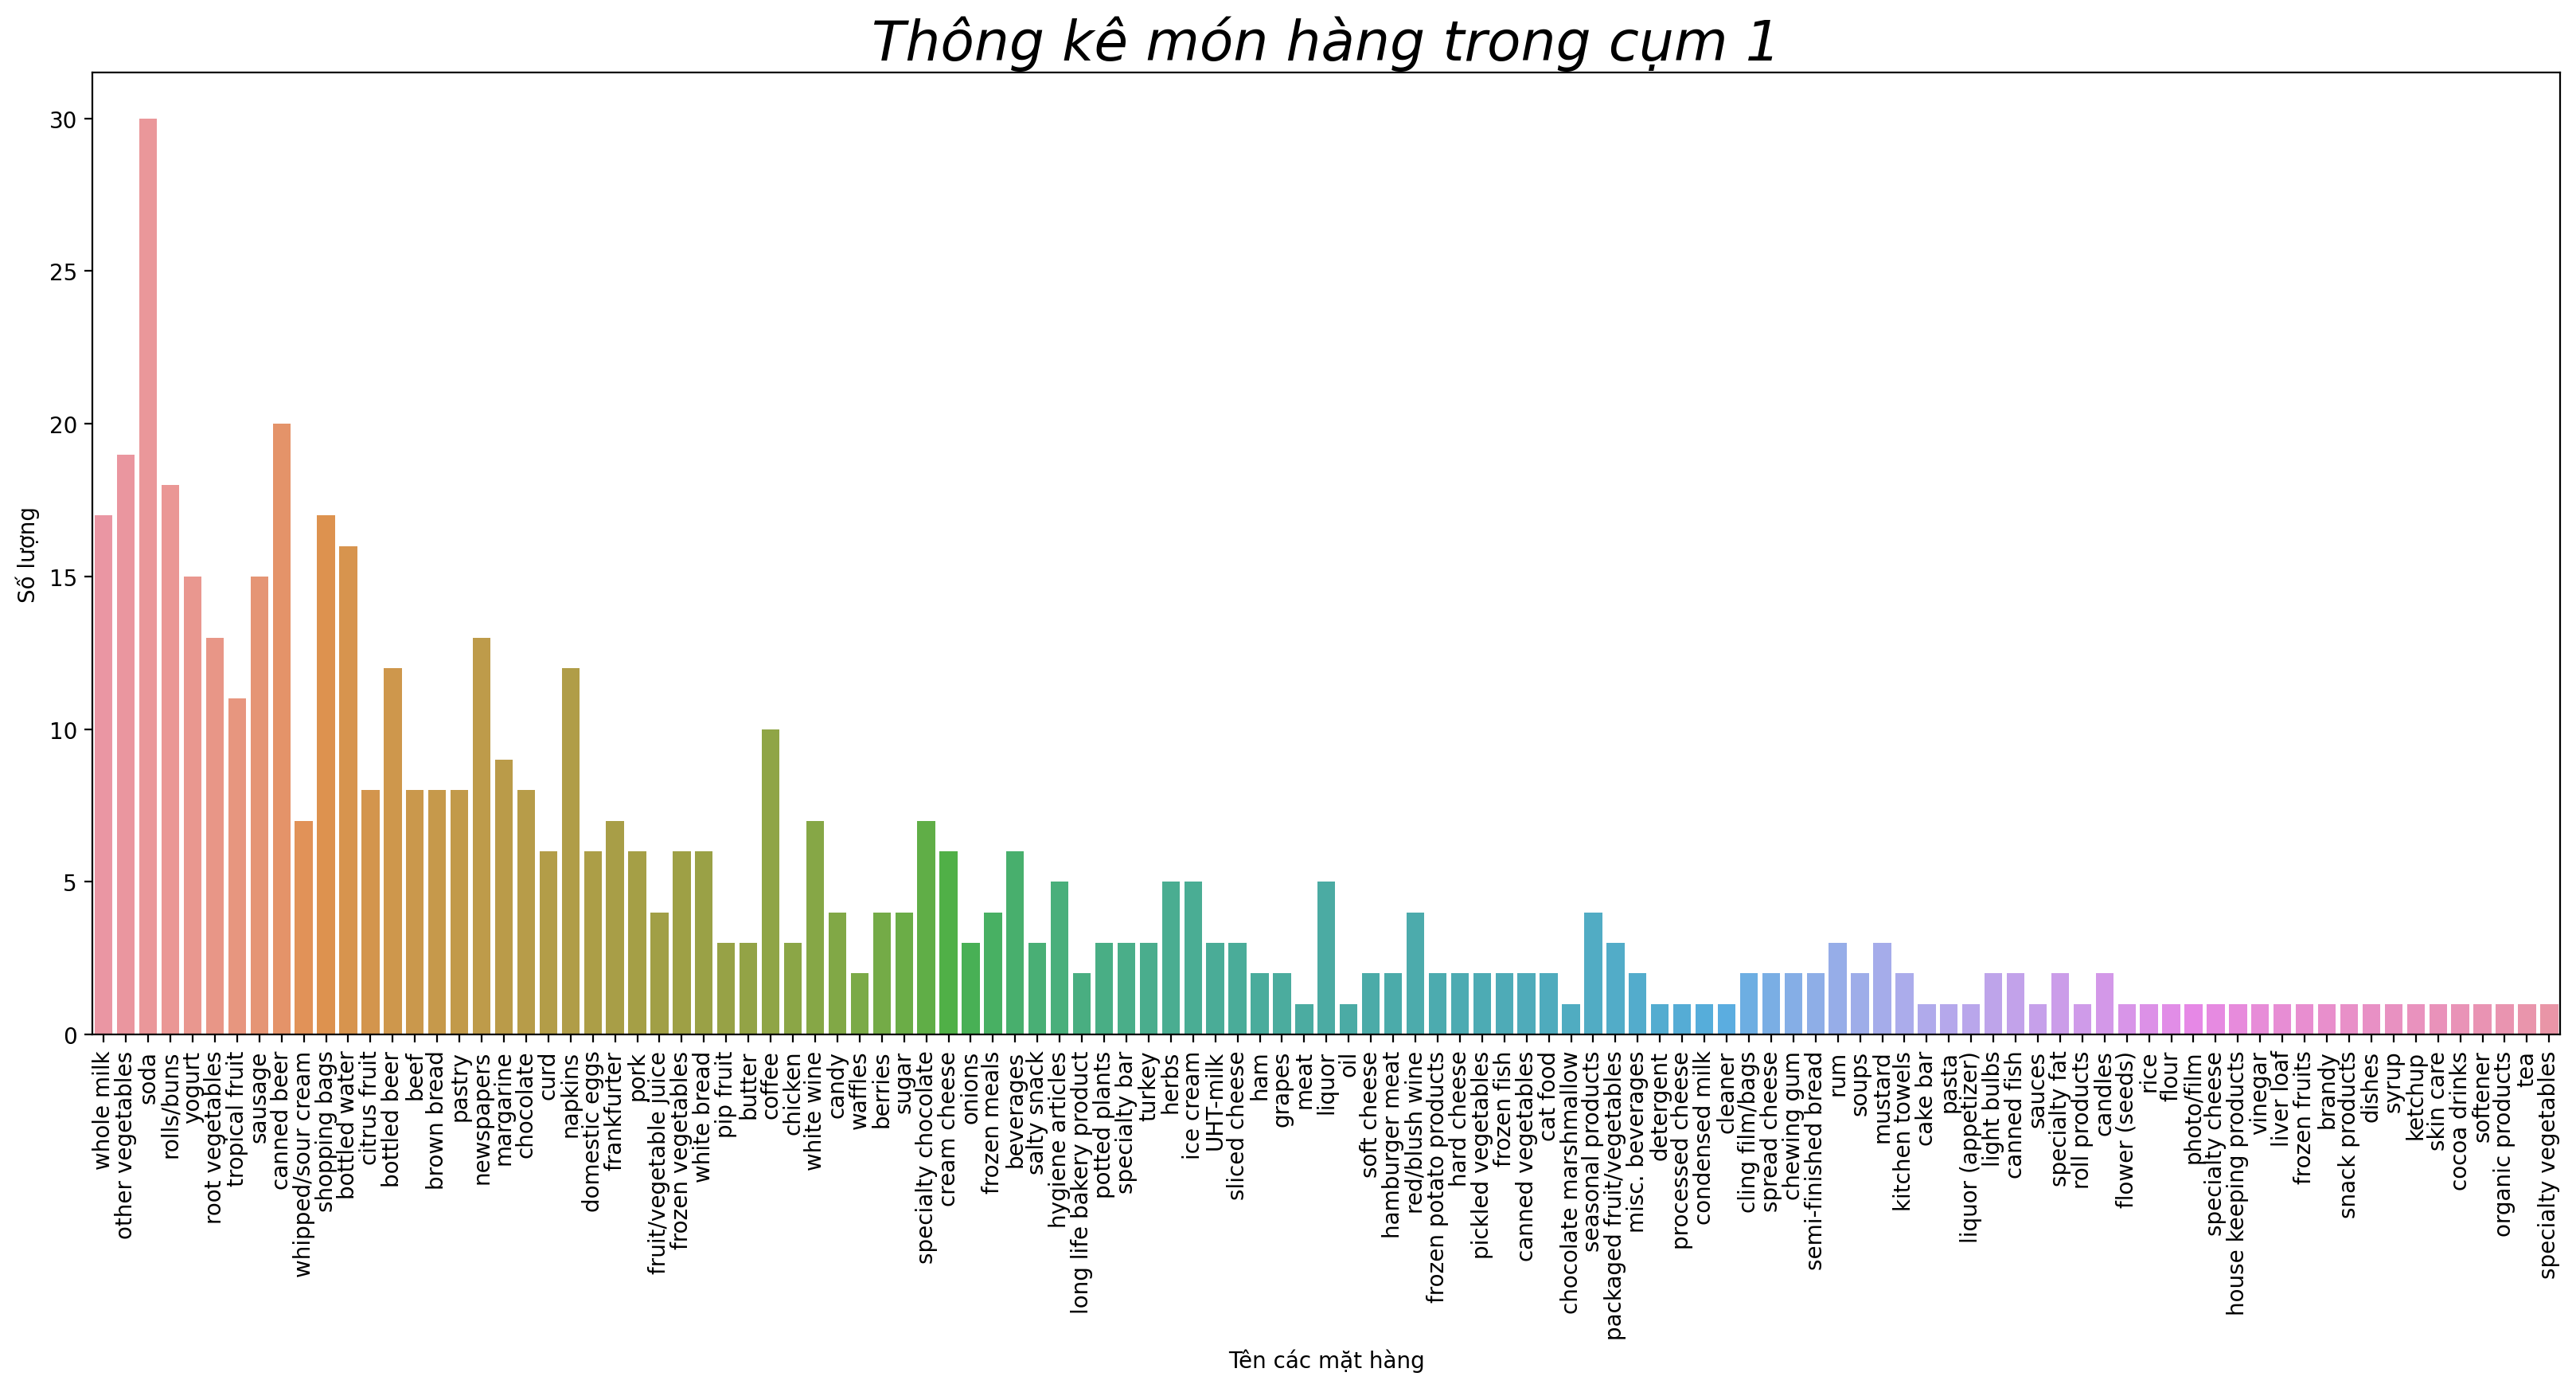

In [ ]:
Cum_KMean(0)
Cum_KMean(1)

## Girvan Newman

In [ ]:
# Cách 1: Dùng thư viên của network x
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)

k = 2
for number in range(k):
    communities = next(communities_generator)

for coms in range(len(communities)):
    print("Cụm ", coms)
    print(communities[coms])

Cụm  0
{'O7174', 'O1475', 'O9163', 'O7549', 'O2102', 'O7571', 'O8152', 'O7140', 'O9311', 'O0879', 'O1958', 'O7978', 'O6114', 'O4449', 'O2087', 'O1018', 'O9346', 'O0937', 'O3626', 'O5099', 'O2472', 'O3801', 'O8225', 'O1477', 'O0875', 'O8670', 'O5519', 'O2157', 'O1134', 'O7053', 'O0732', 'O1862', 'O7331', 'O0651', 'O7063', 'O7602', 'O8697', 'O0011', 'O4263', 'O3830', 'O3901', 'O9404', 'O0986', 'O5735', 'O5772', 'O9421', 'O5801', 'O3017', 'O4224', 'O2152', 'O3032', 'O3013', 'O4389', 'O8493', 'O7060', 'O8290', 'O3267', 'O7052', 'O7150', 'O5002', 'O0881', 'O2237', 'O1985', 'O1368', 'O0668', 'O0876', 'O4284', 'O2594', 'O7861', 'O7956', 'O0371', 'O4406', 'O5178', 'O6126', 'O2243', 'O0186', 'O3524', 'O8199', 'O0999', 'O8937', 'O7199', 'O2423', 'O7826', 'O9676', 'O4733', 'O8193', 'O5533', 'O3209', 'O0358', 'O4925', 'O3746', 'O9248', 'O7170', 'O1961', 'O2429', 'O0305', 'O7494', 'O8772', 'O2982', 'O8108', 'O6515', 'O5152', 'O7073', 'O2025', 'O4676', 'O2848', 'O5392', 'O4369', 'O7968', 'O9793', 'O

In [65]:
# Cách 2: tự xác định cụm
def CmtyGirvanNewmanStep(G):
    init_ncomp = nx.number_connected_components(G)    #Số lượng components ban đầu
    ncomp = init_ncomp

    while (ncomp <= init_ncomp):
        bw = nx.edge_betweenness_centrality(G)    #Tính edge betweenness
        
        #Tìm tất cá cạnh có độ đo edge betweenness cao nhất bằng nhau và xóa nó đi
        max_ = max(bw.values())
        for k, v in bw.items():
            if float(v) == max_:
                print("xóa cạnh:",k[0],",",k[1] )
                G.remove_edge(k[0],k[1])    # Xóa cạnh
        ncomp = nx.number_connected_components(G)    # Tính lại số lượng components
        x = len(set(list(bw.values())))
        
    print("Số lương cạnh ", len(G.edges()) )
    print("Số lương components ",  ncomp)

In [66]:
H = G.copy()

k = 2

for i in range(k):
    CmtyGirvanNewmanStep(H) 

xóa cạnh: O0808 , O1350
xóa cạnh: O0808 , O0999
xóa cạnh: O0808 , O6840
xóa cạnh: O0808 , O1961
xóa cạnh: O1350 , O5253
xóa cạnh: O0999 , O5253
xóa cạnh: O5253 , O6840
xóa cạnh: O1961 , O5253
Số lương cạnh  5670
Số lương components  2
xóa cạnh: O6282 , O8588
xóa cạnh: O8019 , O8588
xóa cạnh: O8588 , O9346
Số lương cạnh  5667
Số lương components  3


In [67]:
# Lấy các node trong cụm để vào 1 cái list

# nx.number_connected_components(H)
sg = nx.connected_components(H)

node_groups = []
for i in sg:
    node_groups.append(list(i))

print("Số lượng cụm: ", len(node_groups))
for i in range(len(node_groups)):
    print("\nNhóm ", i)
    for i in node_groups[i]:
        print(i, end=", ")


Số lượng cụm:  3

Nhóm  0
O7174, O1475, O9163, O7549, O2102, O7571, O8152, O7140, O9311, O0879, O1958, O7978, O6114, O4449, O2087, O1018, O9346, O0937, O3626, O5099, O2472, O3801, O8225, O1477, O0875, O8670, O5519, O2157, O1134, O7053, O0732, O1862, O7331, O0651, O7063, O7602, O8697, O0011, O4263, O3830, O3901, O9404, O0986, O5735, O5772, O9421, O5801, O3017, O4224, O2152, O3032, O3013, O4389, O8493, O7060, O8290, O3267, O7052, O7150, O5002, O0881, O2237, O1985, O1368, O0668, O0876, O4284, O2594, O7861, O7956, O0371, O4406, O5178, O6126, O2243, O0186, O3524, O8199, O0999, O8937, O7199, O2423, O7826, O9676, O4733, O8193, O5533, O3209, O0358, O4925, O3746, O9248, O7170, O1961, O2429, O0305, O7494, O8772, O2982, O8108, O6515, O5152, O7073, O2025, O4676, O2848, O5392, O4369, O7968, O9793, O5440, O0262, O0105, O2467, O4766, O5635, O1540, O8034, O6200, O8294, O8977, O1350, O6684, O9100, O1450, O6523, O3788, O8015, O3968, O4522, O1263, O5927, O6740, O3292, O5747, O1028, O8031, O7897, O5402, O

In [106]:
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('orange')
    elif node in node_groups[1]:
        color_map.append('lime') #xanh lá
    elif node in node_groups[2]:
        color_map.append('cyan') #xanh da trời
    elif node in node_groups[3]:
        color_map.append('pink')
    else:
        color_map.append('royalblue')

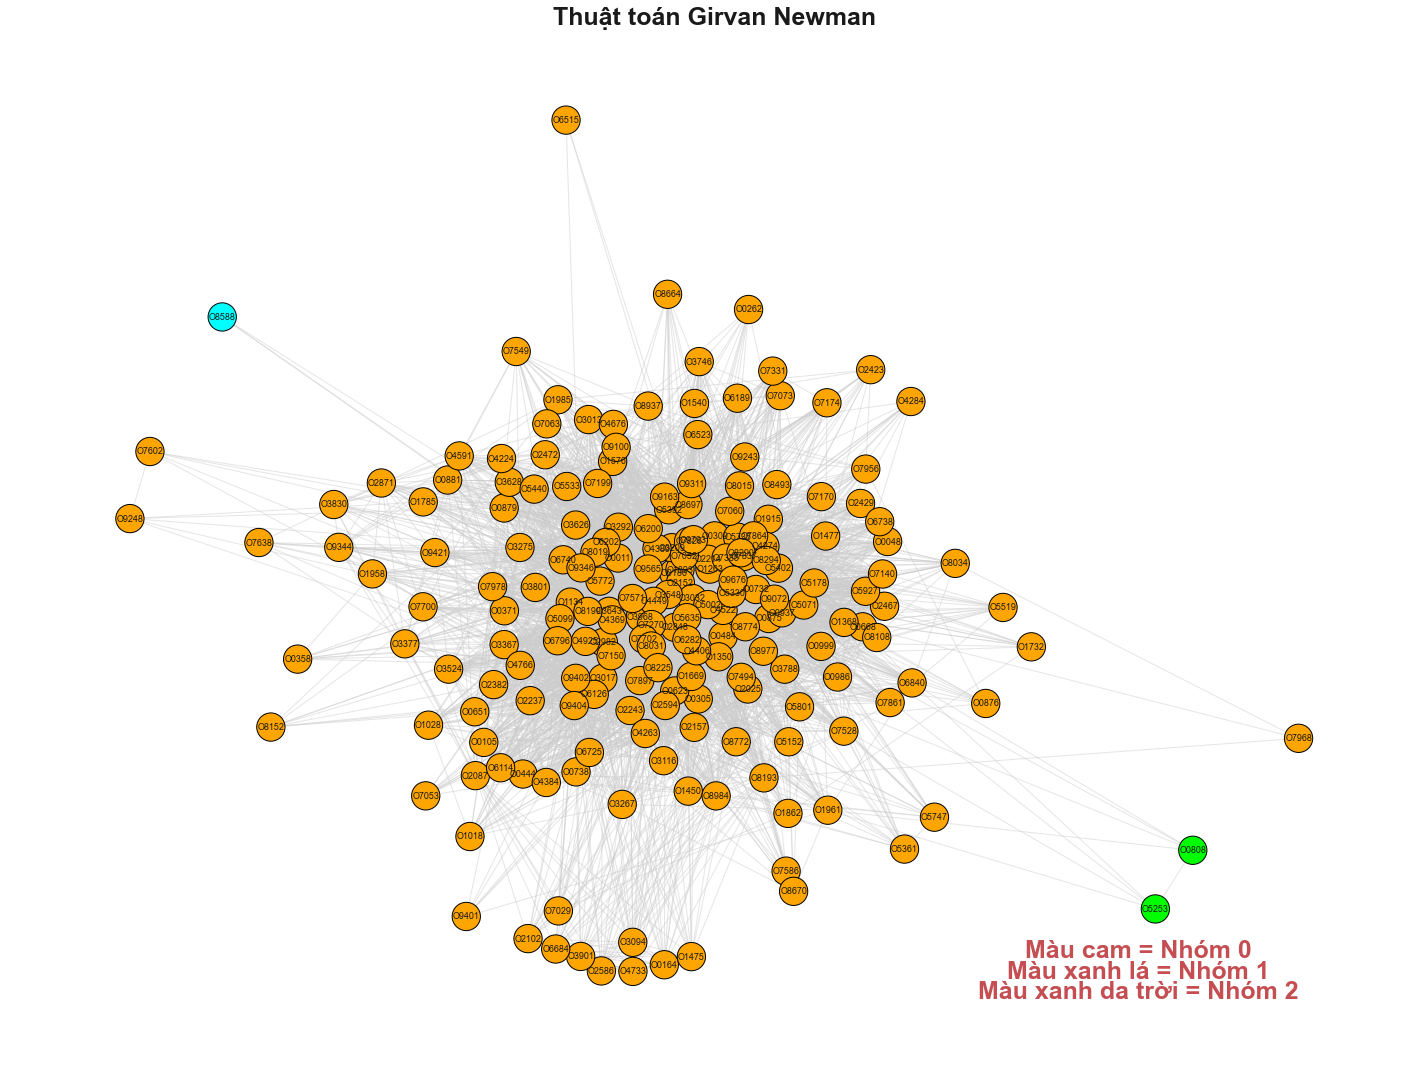

In [109]:
# Vẽ đồ thị
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(G, k = 0.1)

nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color="#CCCCCC") 
nx.draw_networkx_nodes(G, pos, node_size=800,  node_color= color_map, edgecolors='black') 
nx.draw_networkx_labels(G, pos, font_size=9)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 25}
ax.set_title("Thuật toán Girvan Newman", font)
# Change font color for legend
font["color"] = "r"

ax.text(0.80,  0.1, "Màu cam = Nhóm 0",
    horizontalalignment="center", transform=ax.transAxes, fontdict=font)
ax.text(0.80, 0.08, "Màu xanh lá = Nhóm 1",
    horizontalalignment="center", transform=ax.transAxes, fontdict=font)
ax.text(0.80, 0.06, "Màu xanh da trời = Nhóm 2",
    horizontalalignment="center", transform=ax.transAxes, fontdict=font)


# Resize figure for label readibility
# ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

In [70]:
def ItemInClusteringGVNM(ith):
    itemlist = pd.DataFrame(columns=['Item'])

    for k in node_groups[ith]:
        df = df_order.loc[df_order['OrderID'] == k]
        nitem = int(df['Item(s)'])
        for i in range(nitem):
            itemlist = itemlist.append({'Item': df.iloc[0, 2+i]}, ignore_index=True)
    
    print(itemlist)
    return itemlist

                   Item
0        tropical fruit
1           canned beer
2       root vegetables
3                 herbs
4    whipped/sour cream
..                  ...
936          mayonnaise
937       domestic eggs
938           margarine
939               sugar
940       potted plants

[941 rows x 1 columns]


Text(0.5, 1.0, 'Thông kê món hàng trong cụm 0')

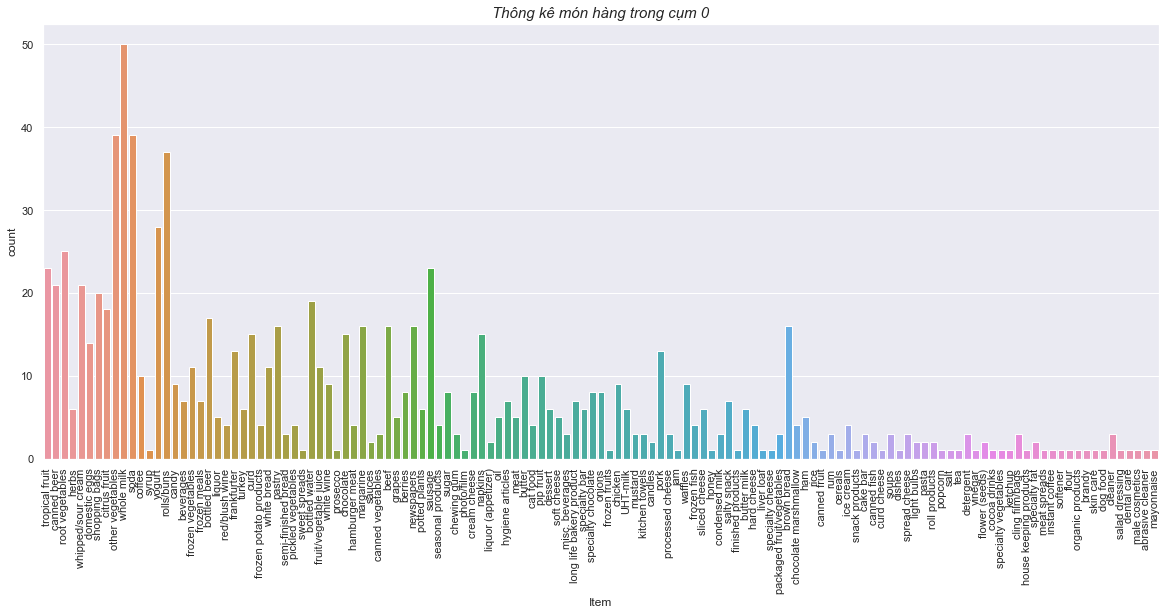

In [82]:
import seaborn as sns
df0 = ItemInClusteringGVNM(0)
sns.countplot(x='Item',data=df0)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(rotation=90)
plt.title('Thông kê món hàng trong cụm 0',fontsize=15, style='oblique')

        Item
0  ice cream
1  ice cream


Text(0.5, 1.0, 'Thông kê món hàng trong cụm 1')

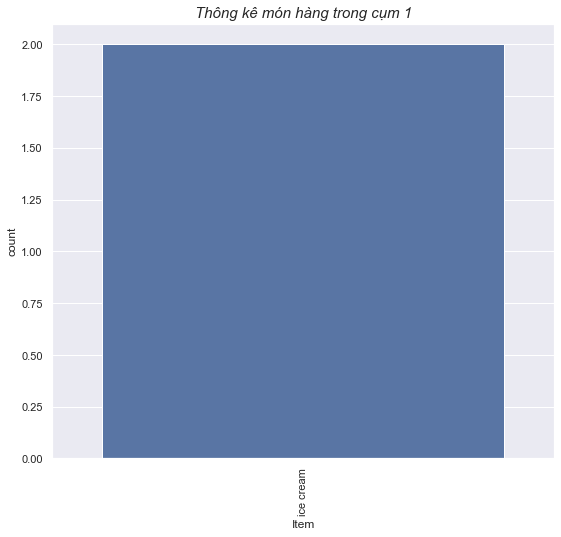

In [77]:
import seaborn as sns
df1 = ItemInClusteringGVNM(1)
sns.countplot(x='Item',data=df1)
sns.set(rc={'figure.figsize':(9,8)})
plt.xticks(rotation=90)
plt.title('Thông kê món hàng trong cụm 1',fontsize=15, style='oblique')

                Item
0  canned vegetables


Text(0.5, 1.0, 'Thông kê món hàng trong cụm 2')

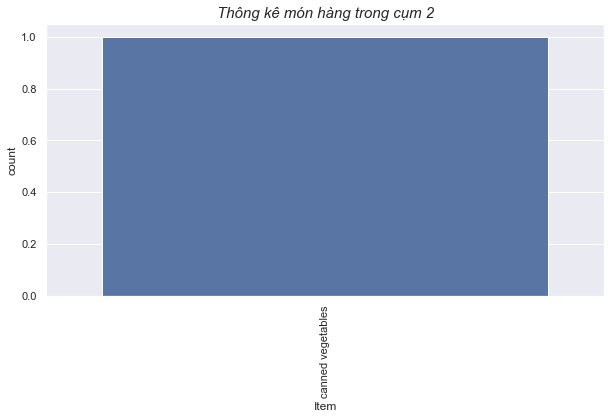

In [76]:
import seaborn as sns
df1 = ItemInClusteringGVNM(2)
sns.countplot(x='Item',data=df1)
sns.set(rc={'figure.figsize':(9,8)})
plt.xticks(rotation=90)
plt.title('Thông kê món hàng trong cụm 2',fontsize=15, style='oblique')

# Measures

## Degree

In [122]:
degree = nx.degree(G)
df_degree = pd.DataFrame(data = degree, columns=['OrderID','degree'])
df_degree.sort_values(by='degree', ascending=False).head(10) #sắp xếp

OrderID  degree
93    O4449     147
124   O6282     140
4     O0186     136
113   O5635     135
65    O3032     135
28    O1263     133
144   O7270     124
60    O2848     118
89    O4369     117
94    O4522     116

## Closeness

In [113]:
closeness = nx.closeness_centrality(G)
df_closeness = pd.DataFrame.from_dict(data = closeness, orient='index')
df_closeness.columns = ['closeness_centrality']
df_closeness.index.names = ['OrderID']
df_closeness.reset_index(level=0, inplace=True)
df_closeness.sort_values(by='closeness_centrality', ascending=False).head(10) #sắp xếp

OrderID  closeness_centrality
93    O4449          0.7928286853
124   O6282          0.7713178295
4     O0186          0.7595419847
113   O5635          0.7566539924
65    O3032          0.7566539924
28    O1263          0.7509433962
144   O7270          0.7262773723
60    O2848          0.7107142857
94    O4522          0.7056737589
89    O4369          0.7056737589

## Harmonic Centrality

In [112]:
harmonic = nx.harmonic_centrality(G)
df_harmonic = pd.DataFrame.from_dict(data = harmonic, orient='index')
df_harmonic.columns = ['harmonic_centrality']
df_harmonic.index.names = ['OrderID']
df_harmonic.reset_index(level=0, inplace=True)
df_harmonic.sort_values(by='harmonic_centrality', ascending=False).head(10) #sắp xếp

OrderID  harmonic_centrality
12    O4449       173.0000000000
58    O6282       169.5000000000
83    O0186       167.5000000000
38    O5635       167.0000000000
37    O3032       167.0000000000
131   O1263       166.0000000000
123   O7270       161.5000000000
169   O2848       158.5000000000
29    O4369       157.8333333333
26    O4522       157.5000000000

## Eigenvector Centrality

In [111]:
eigenvector = nx.eigenvector_centrality(G, max_iter=100)
df_eigenvector = pd.DataFrame.from_dict(data = eigenvector, orient='index')
df_eigenvector.columns = ['eigenvector_centrality']
df_eigenvector.index.names = ['OrderID']
df_eigenvector.reset_index(level=0, inplace=True)
df_eigenvector.sort_values(by='eigenvector_centrality', ascending=False).head(10) #sắp xếp

OrderID  eigenvector_centrality
93    O4449            0.1379939757
113   O5635            0.1375687508
65    O3032            0.1355738328
28    O1263            0.1307544089
124   O6282            0.1300681576
144   O7270            0.1285119034
4     O0186            0.1283726203
60    O2848            0.1251526050
94    O4522            0.1229054138
89    O4369            0.1204853585

## Pagerank

In [101]:
pagerank = nx.pagerank(G)
df_pagerank = pd.DataFrame.from_dict(data = pagerank, orient='index')
df_pagerank.columns = ['pagerank']
df_pagerank.index.names = ['OrderID']
df_pagerank.reset_index(level=0, inplace=True)
df_pagerank.sort_values(by='pagerank', ascending=False).head(10) #sắp xếp

OrderID      pagerank
4     O0186  0.0179121843
65    O3032  0.0164814646
93    O4449  0.0161644179
28    O1263  0.0159605256
113   O5635  0.0152110140
124   O6282  0.0145987977
50    O2214  0.0120615572
144   O7270  0.0120427498
94    O4522  0.0118666115
199   O9793  0.0116686033

## Betweenness Centrality

In [86]:
betweenness = nx.betweenness_centrality(G)
df_betweenness = pd.DataFrame.from_dict(data = betweenness, orient='index')
df_betweenness.columns = ['betweenness_centrality']
df_betweenness.index.names = ['OrderID']
df_betweenness.reset_index(level=0, inplace=True)
df_betweenness.sort_values(by='betweenness_centrality', ascending=False).head(10) #sắp xếp

OrderID  betweenness_centrality
124   O6282                0.041294
93    O4449                0.033055
4     O0186                0.026957
29    O1350                0.023282
28    O1263                0.022800
194   O9402                0.017579
165   O8019                0.017169
65    O3032                0.016637
89    O4369                0.014160
86    O4263                0.013564